# Simulazione d'esame Laboratorio di Programmazione 2

## Esercizio 1

1. Crea un vettore NumPy con i seguenti **canoni mensili d'affitto** (in euro) per 4 appartamenti: **720, 980, 650, 1200**

2. Calcola la **spesa totale mensile** sostenuta dagli inquilini.

3. Il proprietario dell'appartamento da **1200 €** decide di **aumentare l’affitto del 12%**.
    - Modifica il vettore per applicare l’aumento.
    - L’importo aggiornato deve essere esattamente **1344,00 €**, controlla se appare **esattamente** nel tuo array.


4. L'inquilino dell'appartamento da **650 €** ottiene uno **sconto del 10%**.
    - Applica la modifica.

5. Gli altri due appartamenti (**720 € e 980 €**) subiscono un **aumento del 5%**.
    - Aggiorna il vettore di conseguenza.

7. Calcola la **nuova spesa totale mensile** dopo tutti i cambiamenti.

8. Infine: quanto ha influito **l’aumento dell’affitto più alto** sulla spesa complessiva?

    (Suggerimento: confronta la spesa totale **prima di qualsiasi modifica** e **dopo il solo aumento del canone a 1200 €**.)


In [25]:
import numpy as np

In [26]:
affitto = np.array([720, 980, 650, 1200], dtype = np.float64)
print("Affitti iniziali: ", affitto)

Affitti iniziali:  [ 720.  980.  650. 1200.]


In [27]:
spesa_mensile = np.sum(affitto)
print("Spesa mensile iniziale: ", spesa_mensile)

Spesa mensile iniziale:  3550.0


In [28]:
affitto = np.where(affitto == 1200, affitto * 1.12, affitto)
affitto = np.round(affitto, 2)
print("L'affitto dopo l'aumento è 1344.00? ", affitto[3] == 1344.00)
print("Affitto dopo l'aumento per l'appartamento da 1200€: ", affitto)

L'affitto dopo l'aumento è 1344.00?  True
Affitto dopo l'aumento per l'appartamento da 1200€:  [ 720.  980.  650. 1344.]


In [29]:
spesa_mensile_primo_aumento = np.sum(affitto)
print("Spesa mensile dopo il primo aumento: ", spesa_mensile_primo_aumento)

Spesa mensile dopo il primo aumento:  3694.0


In [30]:
affitto = np.where(affitto == 650, affitto * 0.95, affitto)
print("Affitti dopo lo sconto per l'appartamento da 650€: ", affitto)

Affitti dopo lo sconto per l'appartamento da 650€:  [ 720.   980.   617.5 1344. ]


In [31]:
affitto = np.where(affitto == 720, affitto * 1.05, affitto)
affitto = np.where(affitto == 980, affitto * 1.05, affitto)
print("Affitti dopo gli aumenti per gli appartamenti da 720€ e 980€: ", affitto)

Affitti dopo gli aumenti per gli appartamenti da 720€ e 980€:  [ 756.  1029.   617.5 1344. ]


In [32]:
nuova_spesa_mensile = np.sum(affitto)
print("Spesa mensile finale: ", nuova_spesa_mensile)

Spesa mensile finale:  3746.5


In [33]:
print("Spesa mensile iniziale: ", spesa_mensile)
print("Spesa mensile dopo il primo aumento: ", spesa_mensile_primo_aumento)
print("Differenza dopo il primo aumento: ", spesa_mensile_primo_aumento - spesa_mensile)
print("Spesa mensile finale: ", nuova_spesa_mensile)

Spesa mensile iniziale:  3550.0
Spesa mensile dopo il primo aumento:  3694.0
Differenza dopo il primo aumento:  144.0
Spesa mensile finale:  3746.5


## Esercizio 2

Consideriamo un semplice processo di random walk (cammino aleatorio) in una dimensione:
a ogni passo temporale, un camminatore si sposta a destra (+1) o a sinistra (-1) con uguale probabilità. Supponiamo che il camminatore parta sempre da x=0.

1. Scrivi una funzione che simula il cammino per n passi ed N camminatori e restituisce due array. Il primo rappresenta la media della posizione ad ogni passo degli N camminatori ed il secondo la deviazione standard della posizione ad ogni passo degli N camminatori.

2. Fai prima il plot della media delle posizione degli N camminatori per 100 passi 

3. Fai il plot con anche la devizione standard.  La deviazione standard diminuisce all'aumentare del campione? Che andamento ha la deviazione standard rispeto l tempo/passi?

In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def random_walk(n, N):
    steps = np.random.choice([-1, 1], size=(N, n))
    walk = steps.cumsum(axis=1)
    media = walk.mean(axis=0)
    std = walk.std(axis=0)
    return media, std

In [36]:
np.random.seed(0)
media, std = random_walk(n = 100, N = 1000)
print(std)

[0.9995499  1.37952891 1.68697481 1.97033906 2.18171951 2.39275908
 2.55141059 2.69804077 2.88426351 3.00170352 3.14482368 3.33581234
 3.44025813 3.62306169 3.72599034 3.87124579 4.00493895 4.15608277
 4.25948307 4.41225747 4.52067075 4.6156447  4.72577232 4.78544293
 4.92311446 5.01171069 5.17006422 5.27952687 5.37235554 5.42069184
 5.46694467 5.56145269 5.64530779 5.7455287  5.83647531 5.91415793
 6.04044899 6.12332459 6.24631443 6.31960473 6.43181809 6.53225841
 6.62033111 6.67256952 6.70760762 6.78878487 6.79245582 6.84742024
 6.89196518 6.95685877 7.04397615 7.15289899 7.1812155  7.26469573
 7.29917365 7.40780102 7.43703059 7.54597535 7.57627217 7.57489934
 7.58863123 7.60575545 7.63830321 7.72279095 7.80078355 7.87760141
 7.90371027 7.90043138 7.9640771  8.05838296 8.10559091 8.11189522
 8.15203508 8.25820101 8.35393464 8.42799502 8.52793902 8.52960937
 8.57123002 8.6512658  8.69092768 8.80414425 8.87274569 8.92525316
 9.01676217 9.08746389 9.1008571  9.15916503 9.16148438 9.2301

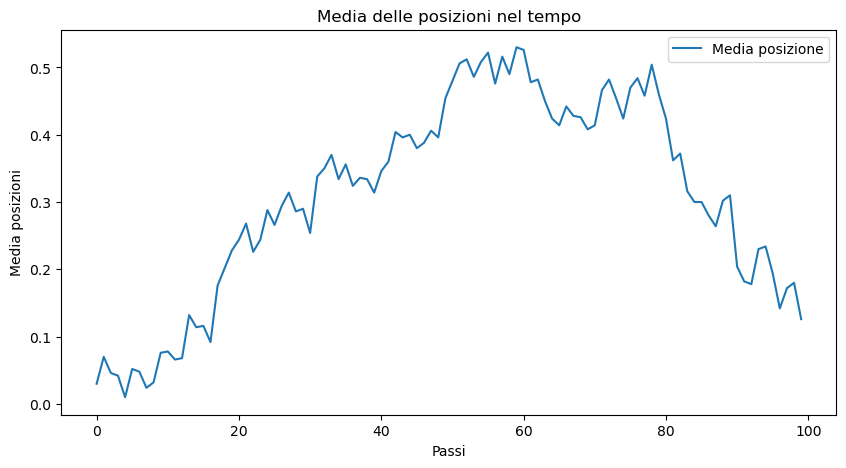

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(media, label = 'Media posizione')
plt.title('Media delle posizioni nel tempo')
plt.xlabel('Passi')
plt.ylabel('Media posizioni')
plt.legend()
plt.show()

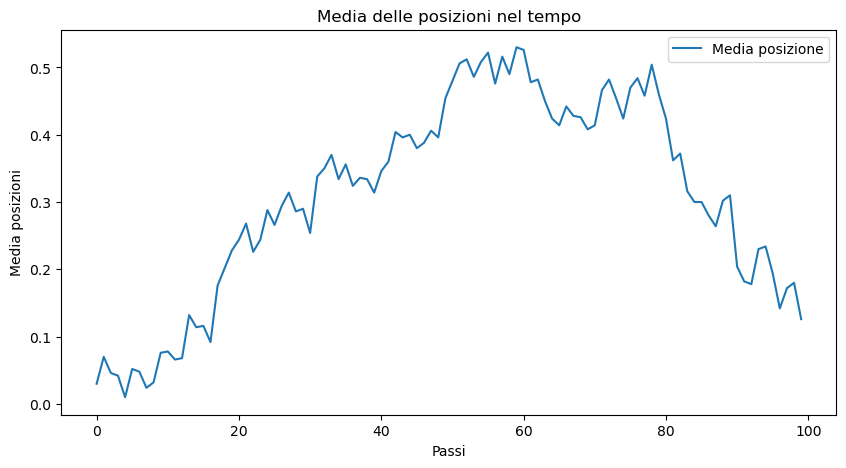

In [ ]:
# GRAFICO AGGIORNATO 
plt.figure(figsize=(10, 5))
time = np.arange(100) # n = 100
plt.plot(time, media, label = 'Media posizione')
plt.title('Media delle posizioni nel tempo')
plt.xlabel('Passi')
plt.ylabel('Media posizioni')
plt.legend()
plt.show()

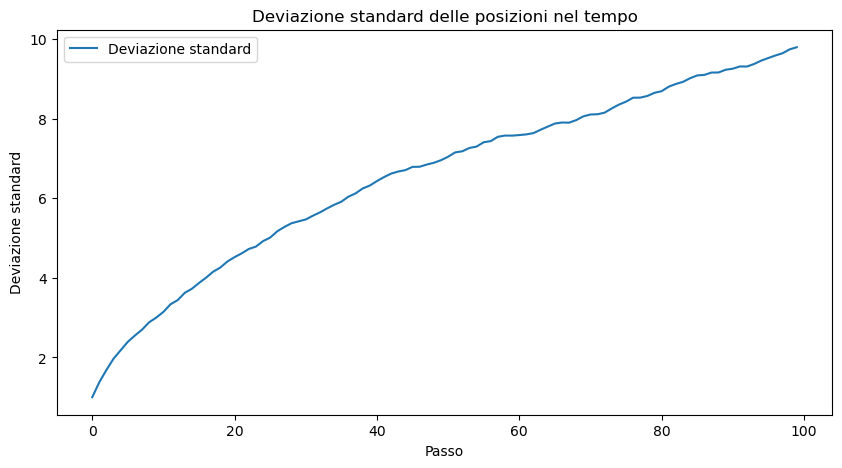

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(std, label = 'Deviazione standard')
plt.title('Deviazione standard delle posizioni nel tempo')
plt.xlabel('Passo')
plt.ylabel('Deviazione standard')
plt.legend()
plt.show()

# Questo grafico traccia solo la curva della deviazione standard nel tempo.
# Dice quanto è ampio lo scarto medio a ogni passo.

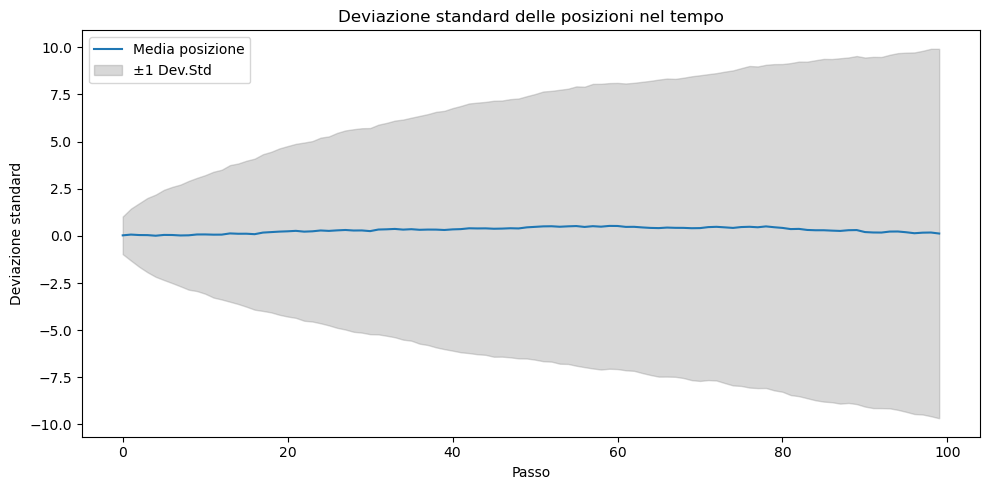

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(time, media, label = 'Media posizione')
plt.fill_between(time, media - std, media + std, color='gray', alpha=0.3, label='±1 Dev.Std')
plt.title('Deviazione standard delle posizioni nel tempo')
plt.xlabel('Passo')
plt.ylabel('Deviazione standard')
plt.tight_layout()
plt.legend()
plt.show()

# Dice dove si concentrano le posizioni tipiche (media ± 1 dev.std), mostrando sia il centro sia la dispersione.

La deviazione standard NON aumenta all'aumentare dei campioni (come si può vedere di seguito, analizzando l'errore standard).
Essa, invece, aumenta all'aumentare del numero di passi.

In [41]:
media, std = random_walk(n = 100, N = 1000)
print("Errore standard con N = 1000 all'ultimo passo" , (std / np.sqrt(1000))[-1])

media, std = random_walk(n = 100, N = 100000)
print("Errore standard con N = 100000 all'ultimo passo", (std / np.sqrt(100000))[-1])

Errore standard con N = 1000 all'ultimo passo 0.3233759669486895
Errore standard con N = 100000 all'ultimo passo 0.031688329463005885


## Esercizio 3

Genera un array `a` di dimensioni **5 x 9** contenente numeri da una distribuzione gaussiana con media 0 e dev standard 1.  
Per ogni riga, seleziona il numero **più vicino a 0.1**.
Imposta il seed per la riproducibilità `np.random.seed(42)`

 *Suggerimento*: per ottenere `a[i, j]`, l'array `i` deve contenere gli **indici di riga** corrispondenti agli elementi in `j`.


In [42]:
np.random.seed(42)
a = np.random.normal(0, 1, (5,9))
print (a)

[[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
   1.57921282  0.76743473 -0.46947439]
 [ 0.54256004 -0.46341769 -0.46572975  0.24196227 -1.91328024 -1.72491783
  -0.56228753 -1.01283112  0.31424733]
 [-0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
  -0.54438272  0.11092259 -1.15099358]
 [ 0.37569802 -0.60063869 -0.29169375 -0.60170661  1.85227818 -0.01349722
  -1.05771093  0.82254491 -1.22084365]
 [ 0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
  -0.11564828 -0.3011037  -1.47852199]]


In [43]:
indici = np.abs(a - 0.1).argmin(axis=1) # array di indici (uno per riga)
righe = np.arange(a.shape[0]) # array che rappresenta gli indici delle righe
valori_vicini = a[righe, indici] # fancy indexing

print("Valori più vicini a 0.1:", valori_vicini)

Valori più vicini a 0.1: [-0.1382643   0.24196227  0.11092259 -0.01349722  0.17136828]


## Esercizio 4

Utilizza il dataset `titanic`, disponibile all'url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

Esegui un’analisi esplorativa sui dati dei passeggeri, focalizzandoti su tariffe, età e componenti familiari.

1. **Visualizza i primi 10 passeggeri ordinati per tariffa pagata** (`Fare`), dal più alto al più basso.

2. **Calcola la media** di:
   - `Age` (età)
   - `Fare` (tariffa)
   - `SibSp` (numero di fratelli/coniugi a bordo)

3. **Crea una nuova colonna** chiamata `Family_index`, definita come:

   $$
   \texttt{family\_index} = \frac{\texttt{sibsp} + \texttt{parch}}{\texttt{fare}}
   $$

   *(Indicatore del “peso familiare” per unità di spesa – attenzione a eventuali divisioni per zero!)*

4. Trova il **passeggero con il valore massimo** di `Family_index`.

5. **Filtra solo i passeggeri** che hanno pagato **più di 100** di tariffa (`Fare > 100`).

6. **Crea un grafico a barre** con i 10 passeggeri che hanno pagato di più (`Fare`).

7. **Crea un grafico a linee** dell’età (`Age`), ordinando i passeggeri per tariffa (`Fare`) crescente.



💡 *Suggerimenti*:
- Ricordati di gestire eventuali valori mancanti in `Age` o `Fare` prima di fare operazioni.


In [44]:
import pandas as pd

In [45]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
print(df.head(10))

URLError: <urlopen error [Errno 54] Connection reset by peer>

In [ ]:
df = df.dropna(subset=['Fare', 'Age'])

In [ ]:
# Visualizza i primi 10 passeggeri ordinati per tariffa pagata (`Fare`), dal più alto al più basso.
prime_dieci = df.sort_values(by = 'Fare', ascending = False).head(10)

In [ ]:
df['Age'].mean()
df['Fare'].mean()
df['SibSp'].mean()

np.float64(0.5126050420168067)

In [ ]:
df['Family_index'] = (df['SibSp'] + df['Parch']) / df['Fare']

df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)  # in caso di divisioni per zero
df.dropna(subset=['Family_index'], inplace=True)

print(df.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Family_index  
0      0         A/5 21171   7.2500   NaN        S      0.137931  
1      0          PC 17599  71.2833   C85        C      0.014029  
2      0  STON/O2. 3101282   7.9250   NaN        S      0.000000  
3      0            113803  53.1000  C123        S  

In [ ]:
# Trova il passeggero con il valore massimo di `Family_index`.
valore_massimo = df['Family_index'].max()
print(df[df['Family_index'] == valore_massimo])

    PassengerId  Survived  Pclass                             Name     Sex  \
68           69         1       3  Andersson, Miss. Erna Alexandra  female   

     Age  SibSp  Parch   Ticket   Fare Cabin Embarked  Family_index  
68  17.0      4      2  3101281  7.925   NaN        S      0.757098  


In [ ]:
# Filtra solo i passeggeri che hanno pagato più di 100 di tariffa (`Fare > 100`).
df[df['Fare'] > 100]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_index
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S,0.019011
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S,0.019011
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C,0.004040
195,196,1,1,"Lurette, Miss. Elise",female,58.00,0,0,PC 17569,146.5208,B80,C,0.000000
215,216,1,1,"Newell, Miss. Madeleine",female,31.00,1,0,35273,113.2750,D36,C,0.008828
258,259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,NaN,C,0.000000
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,PC 17582,153.4625,C125,S,0.006516
269,270,1,1,"Bissette, Miss. Amelia",female,35.00,0,0,PC 17760,135.6333,C99,S,0.000000
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,0.019795
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.00,0,1,PC 17558,247.5208,B58 B60,C,0.004040


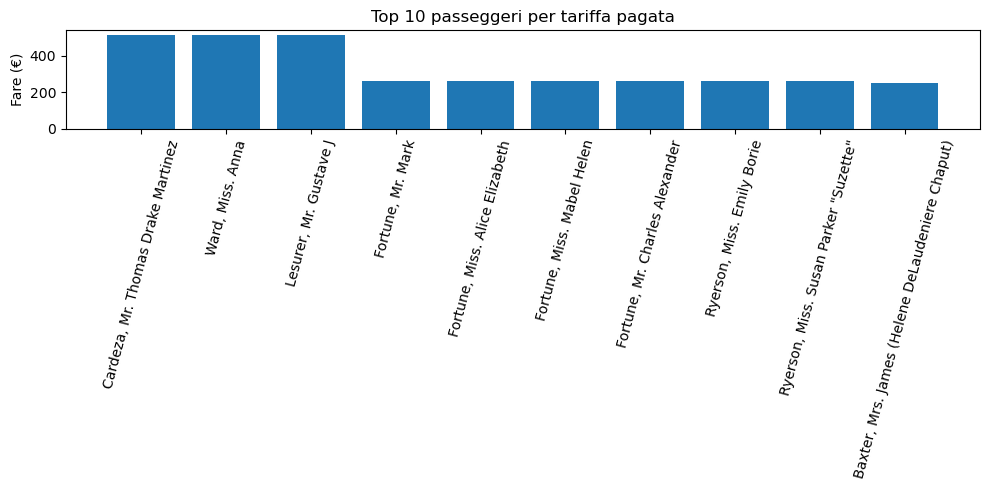

In [ ]:
# Crea un grafico a barre con i 10 passeggeri che hanno pagato di più (`Fare`).
plt.figure(figsize=(10, 5))
plt.bar(prime_dieci['Name'], prime_dieci['Fare'])
plt.title("Top 10 passeggeri per tariffa pagata")
plt.ylabel("Fare (€)")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

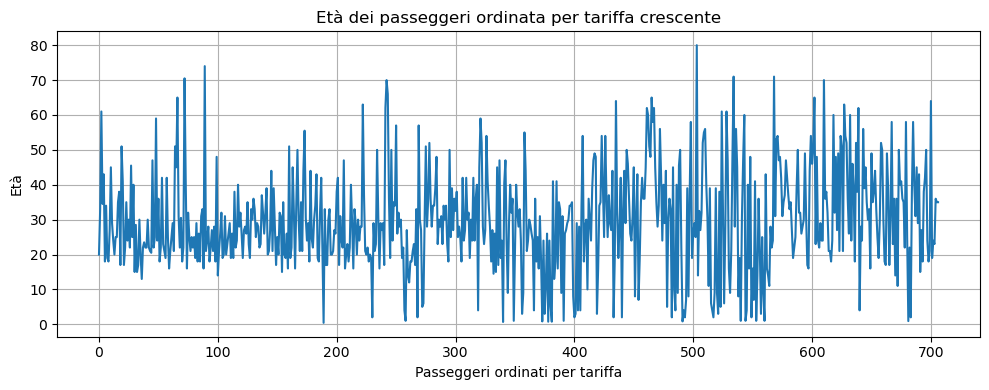

In [ ]:
# Crea un grafico a linee dell’età (`Age`), ordinando i passeggeri per tariffa (`Fare`) crescente.
df_sorted = df.sort_values(by='Fare')
plt.figure(figsize=(10, 4))
plt.plot(df_sorted['Age'].reset_index(drop=True))
plt.title("Età dei passeggeri ordinata per tariffa crescente")
plt.xlabel("Passeggeri ordinati per tariffa")
plt.ylabel("Età")
plt.grid(True)
plt.tight_layout()
plt.show()

## Esercizio 5

Usa il dataset `penguins`, disponibile tramite `seaborn.load_dataset("penguins")`.


1. Quante righe e colonne ha il dataset?

2. Controlla quanti valori mancanti ci sono per colonna.

3. Riempi i valori mancanti nella colonna `sex` con il valore più frequente.

4. Rimuovi le righe in cui il valore `body_mass_g` è mancante.

5. Controlla se ci sono righe duplicate.

6. Calcola la **massa corporea media** (`body_mass_g`) per ogni specie (`species`).
  Se ci sono valori mancanti in `body_mass_g`, riempili con la media della specie.

7. Visualizza la **distribuzione della massa corporea** (`body_mass_g`) per specie.

8.  Visualizza la **distribuzione della massa corporea** per specie, **dividendo per sesso** (`sex`) e mostrandoli a confronto.


💡 Suggerimento: usa `seaborn.violinplot()`, `boxplot()` o `kdeplot()` con `hue='sex'`.


## Esercizio 6

Hai due array NumPy generati come segue:

`x = np.linspace(0, 10, 100)`  
`y = 3 * x + 2 + np.random.normal(0, 1, 100)`

Scrivi una funzione `fit_line(x, y)` che:

- usa `scipy.optimize.curve_fit` per eseguire un **fitting lineare** del tipo `y = a * x + b`;  
- restituisce una tupla contenente:
  - i **parametri ottimizzati** `a` e `b`;  
  - una **stringa** che descrive la retta trovata, ad esempio: `"y = 3.02 * x + 1.95"`.


Esempio di output atteso:   (3.02, 1.95, "y = 3.02 * x + 1.95")

Fai un esempio di utilizzo dove poi plotti i dati e la curva ottenuta.
